# Step 1 :  Import Library and Dataset

In [30]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Read the data in
employee = pd.read_csv(r"C:\Users\HP\Desktop\cloud\Classification\Bank_Loan.csv")

In [32]:
employee.head(5)

,Loan_ID,Age,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Previous_Loan_Taken,Cibil_Score,Property_Area,Customer_Bandwith,Tenure,Loan_Status
0,LP001002,43,Male,No,3,Yes,No,54005,334113,Yes,668,Urban,Good,43,No
1,LP001003,57,Male,Yes,2,Yes,No,28817,736026,Yes,684,Rural,Good,13,Yes
2,LP001005,25,Male,Yes,3,Yes,Yes,99939,712432,Yes,788,Urban,Good,10,No
3,LP001006,44,Male,Yes,1,No,No,38470,267161,Yes,888,Urban,Good,9,No
4,LP001008,58,Male,No,1,Yes,No,28991,402474,Yes,703,Urban,Good,11,No


# Step 2 : Data Pre-Processing

### Removing Irrelavent Variable

In [33]:
employee = employee.drop(['Loan_ID'],axis=1)
employee.columns

Index(['Age', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Previous_Loan_Taken', 'Cibil_Score',
       'Property_Area', 'Customer_Bandwith', 'Tenure', 'Loan_Status'],
      dtype='object')

### Univariate Analysis

In [34]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  981 non-null    int64 
 1   Gender               981 non-null    object
 2   Married              981 non-null    object
 3   Dependents           981 non-null    int64 
 4   Education            981 non-null    object
 5   Self_Employed        981 non-null    object
 6   ApplicantIncome      981 non-null    int64 
 7   LoanAmount           981 non-null    int64 
 8   Previous_Loan_Taken  981 non-null    object
 9   Cibil_Score          981 non-null    int64 
 10  Property_Area        981 non-null    object
 11  Customer_Bandwith    981 non-null    object
 12  Tenure               981 non-null    int64 
 13  Loan_Status          981 non-null    object
dtypes: int64(6), object(8)
memory usage: 107.4+ KB


### Outlier

<Axes: >

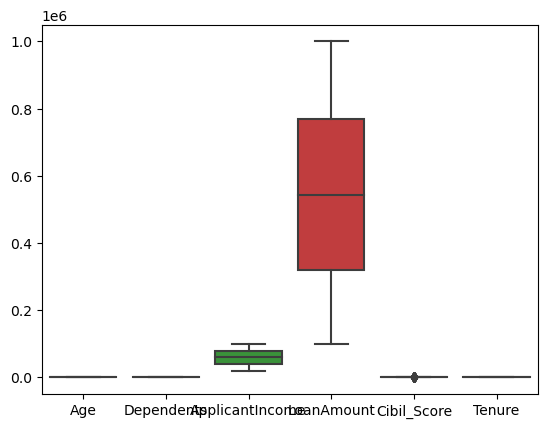

In [35]:
import seaborn as sns
sns.boxplot(data=employee)

### Checking Missing Value

In [36]:
employee.isna().sum()  ## is = check & as = convert

Age                    0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
LoanAmount             0
Previous_Loan_Taken    0
Cibil_Score            0
Property_Area          0
Customer_Bandwith      0
Tenure                 0
Loan_Status            0
dtype: int64

# Churn Rate Analysis

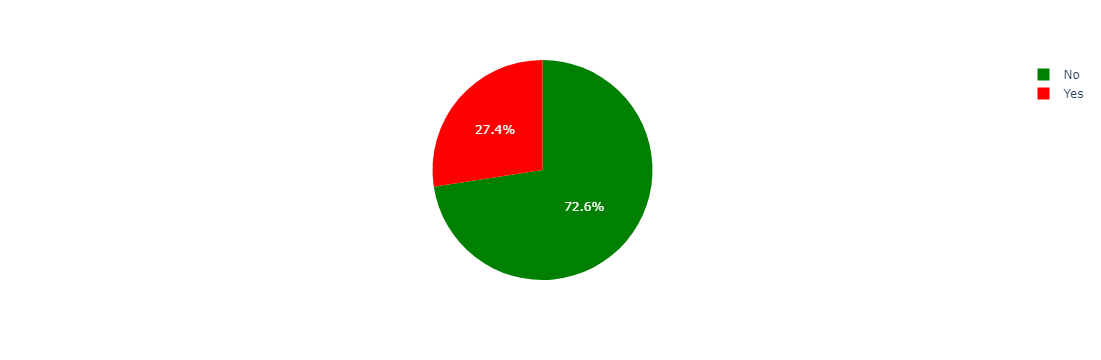

In [37]:
import plotly.express as px

fig = px.pie(employee,names='Loan_Status',color='Loan_Status',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

### Taking subset data of Number 

In [38]:
# #Employee Numeric columns
employee_num = employee.select_dtypes(include=[np.number])
employee_num.head(3)

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure
0,43,3,54005,334113,668,43
1,57,2,28817,736026,684,13
2,25,3,99939,712432,788,10


### Taking subset data of Category 

In [39]:
employee_dummies = employee.select_dtypes(include=['object'])
employee_dummies.head(3)

,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,Male,No,Yes,No,Yes,Urban,Good,No
1,Male,Yes,Yes,No,Yes,Rural,Good,Yes
2,Male,Yes,Yes,Yes,Yes,Urban,Good,No


### Converting Quality Variable to Number

In [40]:
from sklearn.preprocessing import LabelEncoder

employee_dummies = employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)


,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,1,0,1,0,1,2,1,0
1,1,1,1,0,1,0,1,1
2,1,1,1,1,1,2,1,0


### Combine to Dataset

In [41]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)
employee_combined.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status
0,43,3,54005,334113,668,43,1,0,1,0,1,2,1,0
1,57,2,28817,736026,684,13,1,1,1,0,1,0,1,1
2,25,3,99939,712432,788,10,1,1,1,1,1,2,1,0
3,44,1,38470,267161,888,9,1,1,0,0,1,2,1,0
4,58,1,28991,402474,703,11,1,0,1,0,1,2,1,0


#### EDA Completed

# Step 3: Data Partition

In [42]:
from sklearn.model_selection import train_test_split

x = employee_combined.drop(['Loan_Status'],axis=1)
y = employee_combined[['Loan_Status']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()  # by default it use Gini index for split
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

In [44]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

,Loan_Status,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith
384,1,41,1,40507,826347,386,13,1,1,1,0,1,2,0
452,1,58,1,66490,478724,743,42,1,1,1,0,0,0,1
441,0,51,1,34043,989778,689,25,1,1,1,0,1,0,1
300,1,55,3,85756,837981,809,21,1,1,0,0,0,2,1
456,0,24,3,36259,916353,660,32,1,1,1,0,1,2,1


In [45]:
independent_variable = list(train.columns[1:])
independent_variable

['Age',
 'Dependents',
 'ApplicantIncome',
 'LoanAmount',
 'Cibil_Score',
 'Tenure',
 'Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Previous_Loan_Taken',
 'Property_Area',
 'Customer_Bandwith']

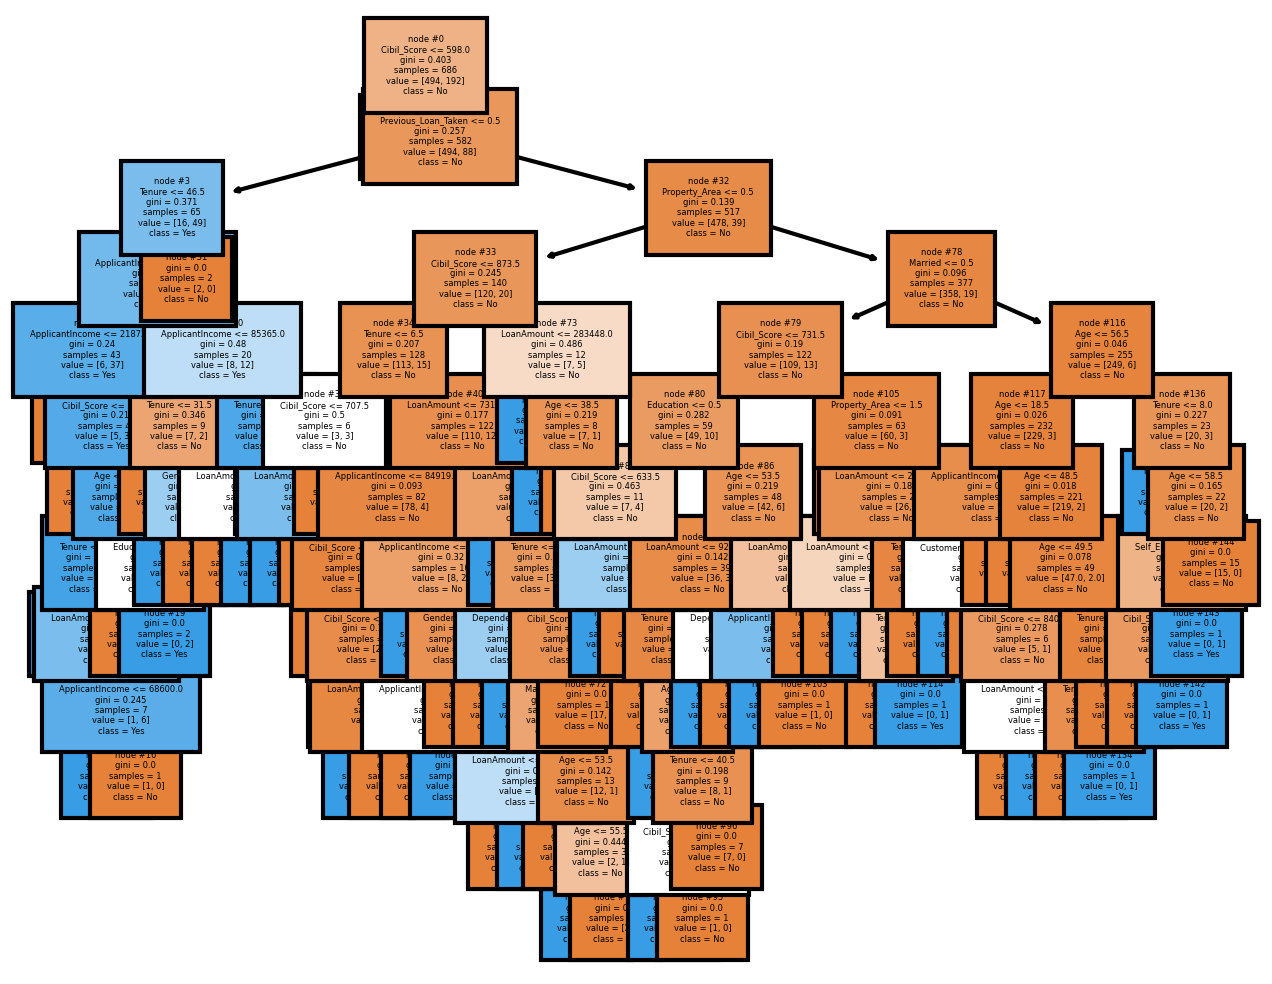

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

churn = ['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 

# Step 6 : Predictions on Train Dataset

In [47]:
train['Predicted'] = dt.predict(X_train)  # MODEL = dt
train.head()

,Loan_Status,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Predicted
384,1,41,1,40507,826347,386,13,1,1,1,0,1,2,0,1
452,1,58,1,66490,478724,743,42,1,1,1,0,0,0,1,1
441,0,51,1,34043,989778,689,25,1,1,1,0,1,0,1,0
300,1,55,3,85756,837981,809,21,1,1,0,0,0,2,1,1
456,0,24,3,36259,916353,660,32,1,1,1,0,1,2,1,0


# Step 7 : Model Performance Metrics

In [48]:
from sklearn.metrics import classification_report
print(classification_report(train['Loan_Status'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       494
           1       1.00      1.00      1.00       192

    accuracy                           1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686



### Model Improvement by Pruning Method ( Cut Tree)

In [49]:
from sklearn import tree

dt2 = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_split=300, #parent
                                 min_samples_leaf=50, ## child
                                 max_depth=4)  #branches

dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=300)

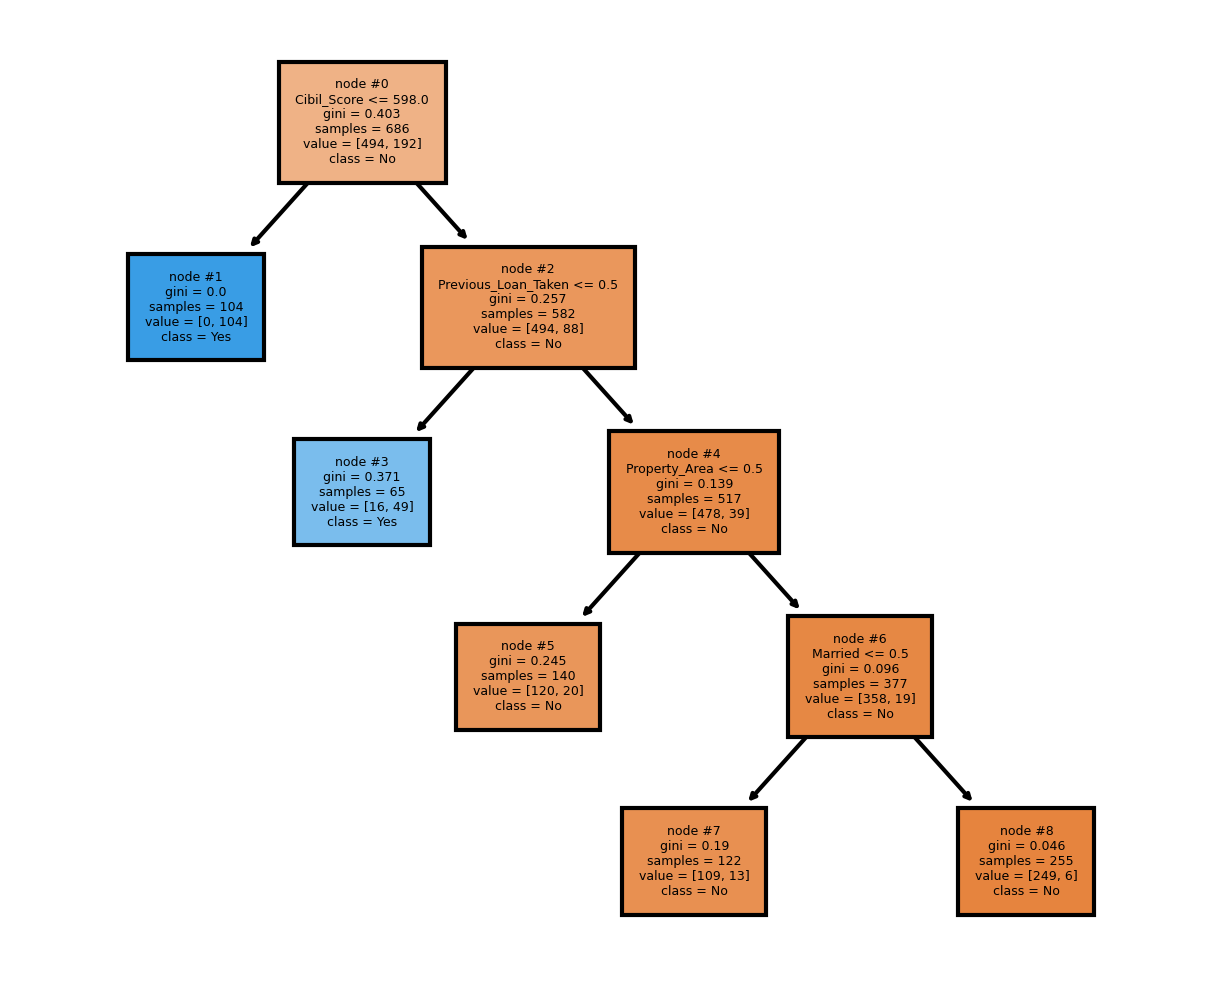

In [50]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt2,  # Model 
               feature_names = independent_variable,  # column name
               class_names = churn, # Yes , No
               filled = True, # colour
               node_ids = True, # node number
               fontsize=3); # 

### Strategy & Prediction
* Contract = Month-to-Month & Monthly Charges > 68 & Tenure <= 15.5 

In [51]:
train['Predicted'] = dt2.predict(X_train)  # MODEL = dt
train.head()

,Loan_Status,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Predicted
384,1,41,1,40507,826347,386,13,1,1,1,0,1,2,0,1
452,1,58,1,66490,478724,743,42,1,1,1,0,0,0,1,1
441,0,51,1,34043,989778,689,25,1,1,1,0,1,0,1,0
300,1,55,3,85756,837981,809,21,1,1,0,0,0,2,1,1
456,0,24,3,36259,916353,660,32,1,1,1,0,1,2,1,0


In [52]:
from sklearn.metrics import classification_report
print(classification_report(train['Loan_Status'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       494
           1       0.91      0.80      0.85       192

    accuracy                           0.92       686
   macro avg       0.91      0.88      0.90       686
weighted avg       0.92      0.92      0.92       686



# Step 8 : Predictions on Test Dataset

In [53]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted'] = dt2.predict(X_test)
test.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith,Loan_Status,Predicted
360,36,5,85231,289078,554,26,0,0,1,0,1,1,2,1,1
824,26,2,31340,511486,723,43,0,0,1,0,1,2,1,0,0
137,54,2,77458,923087,677,46,1,1,1,1,1,2,1,0,0
363,57,1,48546,216341,777,45,1,1,1,0,1,2,1,0,0
763,31,3,52153,124191,645,6,1,0,1,0,1,2,2,0,0


# Step 9 : Model Performance Metrics on Test data 

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test['Loan_Status'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       218
           1       0.94      0.78      0.85        77

    accuracy                           0.93       295
   macro avg       0.93      0.88      0.90       295
weighted avg       0.93      0.93      0.93       295



# Finished

# Model Export

In [55]:
import pickle

pickle.dump(dt2, open(r"C:\Users\Hp\Desktop\Cloud\build.pkl",'wb')) 

In [56]:
X_train.shape

(686, 13)

In [57]:
X_train.head()

,Age,Dependents,ApplicantIncome,LoanAmount,Cibil_Score,Tenure,Gender,Married,Education,Self_Employed,Previous_Loan_Taken,Property_Area,Customer_Bandwith
384,41,1,40507,826347,386,13,1,1,1,0,1,2,0
452,58,1,66490,478724,743,42,1,1,1,0,0,0,1
441,51,1,34043,989778,689,25,1,1,1,0,1,0,1
300,55,3,85756,837981,809,21,1,1,0,0,0,2,1
456,24,3,36259,916353,660,32,1,1,1,0,1,2,1


In [58]:
employee.Property_Area.value_counts()

Property_Area
Semiurban    349
Urban        342
Rural        290
Name: count, dtype: int64